# Twitter US Airline Sentiment Analytics
In this section I am going to do US Airline Sentiment Analytics using Twitter dataset that has been downloaded from kaggle website. The limitation of this usecase is just for Explanatory Data Analysis for Twitter US Airline Sentimen Analysis. The dataset source is from twitter that tweeted from , 2015-02-17 to 2015-02-24 in USA country

<img src="download.png"
     alt="Markdown Monster icon"
     style="float: center; margin-center: 10px;" />

In [213]:
# First thing, we import neccasary library to do EDA

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

from textblob import TextBlob
from textblob import Word

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\firdau064122\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [214]:
#load the twitter US Airline dataset

data= pd.read_csv("tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


# Data Preprocessing
The Data Preprocessing is not Text Preprocessing. so we just do some preparation to know the detail of information of the dataset that we needed for each collumn and rows

In [215]:
print("Shape of the dataframe is",data.shape)

Shape of the dataframe is (14485, 15)


The dimention of the dataframe 14485 rows, and 13 collumn

In [216]:
print("The number of nulls in each column are \n", data.isna().sum())

The number of nulls in each column are 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5403
negativereason_confidence        4069
airline                             0
airline_sentiment_gold          14445
name                                0
negativereason_gold             14453
retweet_count                       0
text                                0
tweet_coord                     13478
tweet_created                       0
tweet_location                   4687
user_timezone                    4775
dtype: int64


the result above, that we can know which collumn that has null values. So we can drop it

In [217]:
print("Percentage null or na values in data")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in data


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.30
negativereason_confidence       28.09
airline                          0.00
airline_sentiment_gold          99.72
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.05
tweet_created                    0.00
tweet_location                  32.36
user_timezone                   32.97
dtype: float64

In [218]:
del data['tweet_coord']
del data['airline_sentiment_gold']
del data['negativereason_gold']
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,JetBlueNews,0,@JetBlue's new CEO seeks the right balance to ...,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,nesi_1992,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,CPoutloud,0,@united yes. We waited in line for almost an h...,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,brenduch,0,@united the we got into the gate at IAH on tim...,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,VahidESQ,0,@SouthwestAir its cool that my bags take a bit...,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


we drop tweet_coord, airline_sentiment_gold, and negativereason_gold collumn because it is not necesarry column and has null value more than 90%

### Drop Duplicate
Deleting dupliacte tweet to keep the original data

In [219]:
tweet_unique = set()
for item in df['text']:
        tweet_unique.add(item)
new_tweet = []
for item in tweet_unique:
    new_tweet.append(item)
    data_text = pd.DataFrame(new_tweet,columns = ['new_text'])

In [220]:
tweet_id = data[data['text'].isin(df_text['new_text'].tolist())]
data_text['tweet_id'] = tweet_id['tweet_id']
data_text.head()

,new_text,tweet_id
0,"@united speaking of my flight, skateboards are...",NaN
1,@USAirways @AmericanAir @SVLLINDIA provides yo...,NaN
2,@AmericanAir it's always nice coming home but ...,NaN
3,@USAirways what is wrong with you guys and you...,NaN
4,@JetBlue We had 2 great flights into and out o...,NaN


### Lower Casing
All of word convert to lower case

In [221]:
data_text['new_text'] = data_text['new_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_text['new_text'].head()

0    @united speaking of my flight, skateboards are...
1    @usairways @americanair @svllindia provides yo...
2    @americanair it's always nice coming home but ...
3    @usairways what is wrong with you guys and you...
4    @jetblue we had 2 great flights into and out o...
Name: new_text, dtype: object

### Punctuation Removal
Deleting all of punctuation

In [222]:
data_text['new_text'] = data_text['new_text'].str.replace('[^\w\s]','')
data_text.head()

,new_text,tweet_id
0,united speaking of my flight skateboards are a...,NaN
1,usairways americanair svllindia provides you t...,NaN
2,americanair its always nice coming home but i ...,NaN
3,usairways what is wrong with you guys and your...,NaN
4,jetblue we had 2 great flights into and out of...,NaN


### Stopwords Removal

In [223]:
stop = stopwords.words('english')
data_text['new_text'] = data_text['new_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data_text['new_text'].head()

0    united speaking flight skateboards allowed car...
1    usairways americanair svllindia provides best ...
2    americanair always nice coming home wish youd ...
3    usairways wrong guys inability get planes phil...
4    jetblue 2 great flights bahamas even bad weath...
Name: new_text, dtype: object

### Frequent Word Removal
To delete spamming word in every tweet

In [224]:
freq = pd.Series(' '.join(data_text['new_text']).split()).value_counts()[:10]
freq = list(freq.index)
data_text['new_text'] = data_text['new_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data_text['new_text'].head()

0    speaking skateboards allowed carry bagage righ...
1    svllindia provides best logistics experience p...
2    always nice coming home wish youd fly laxmad k...
3    wrong guys inability planes philly time pilot ...
4    2 great flights bahamas even bad weather north...
Name: new_text, dtype: object

### Rare Words Removal
To appear of probability asociation rules and minimize the noise

In [225]:
rare_word = pd.Series(' '.join(data_text['new_text']).split()).value_counts()[-10:]
rare_word = list(rare_word.index)
data_text['new_text'] = data_text['new_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data_text['new_text'].head()

0    speaking skateboards allowed carry bagage righ...
1    svllindia provides best logistics experience p...
2    always nice coming home wish youd fly laxmad k...
3    wrong guys inability planes philly time pilot ...
4    2 great flights bahamas even bad weather north...
Name: new_text, dtype: object

### Spelling Correction
To correcting the typo statement each tweet

In [226]:
data_text['new_text'][:5].apply(lambda x: str(TextBlob(x).correct()))
data_text.head()

,new_text,tweet_id
0,speaking skateboards allowed carry bagage righ...,NaN
1,svllindia provides best logistics experience p...,NaN
2,always nice coming home wish youd fly laxmad k...,NaN
3,wrong guys inability planes philly time pilot ...,NaN
4,2 great flights bahamas even bad weather north...,NaN


#### Lematization
Change the word to main word

In [232]:
data_text['new_text'] = data_text['new_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data_text['new_text'].head()

0    speaking skateboard allowed carry bagage right...
1    svllindia provides best logistics experience p...
2    always nice coming home wish youd fly laxmad k...
3    wrong guy inability plane philly time pilot ga...
4    2 great flight bahamas even bad weather northe...
Name: new_text, dtype: object

# Explanatory Data Analysis

In [186]:
Mood_count=Tweet['airline_sentiment'].value_counts()
Mood_count

negative    9082
neutral     3069
positive    2334
Name: airline_sentiment, dtype: int64

In this information, we have the labeled information on tweet each row. So the result is Negative sentiment has the biggest count than neutral and positive. So in this dataset, so many tweeted has negative sentiment than others

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2604
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


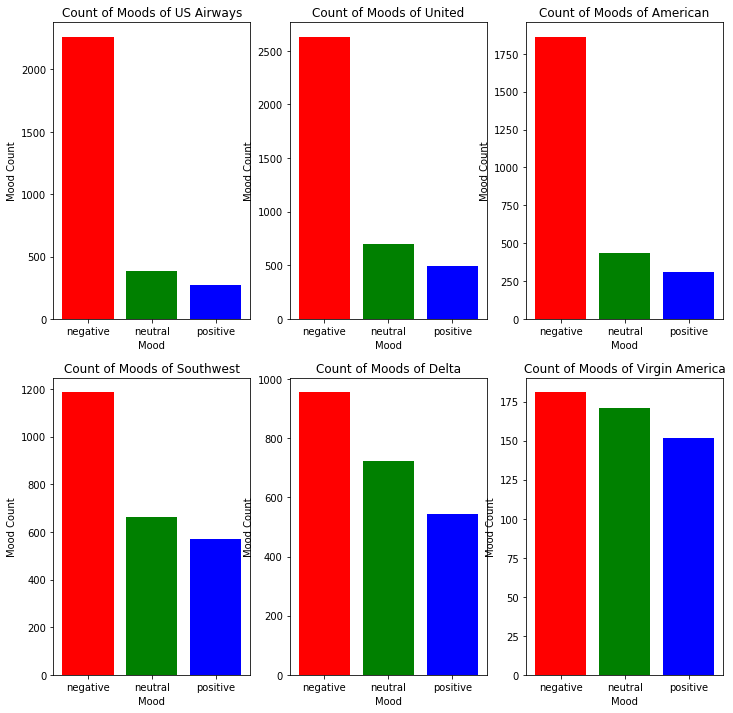

In [187]:
print("Total number of tweets for each airline \n ",data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_data=data[data['airline']==i]
    count=new_data['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

We are plotting distribution of data from each Airline based on sentiment label<br>
- United, US Airways, American substantially get negative reactions.
- Tweets for Virgin America are the most balanced.


In [188]:
from wordcloud import WordCloud,STOPWORDS

This library to see how the big the distribution of text in twitter US Airline dataset based on the sentimental label that has defined before. Wordcloud is a great tool for visualizing nlp data. The larger the words in the wordcloud image , the more is the frequency of that word in our text data.

### Most used Words in Negative Tweets

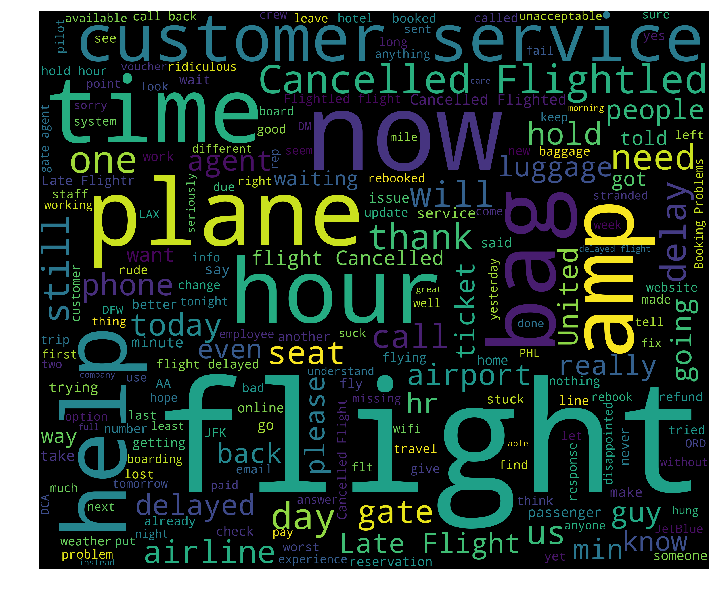

In [235]:
new_data=data[data['airline_sentiment']=='negative']
words = ' '.join(new_data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The result of WordCloud above is to show how frequent of the Negative word appear in every tweets.<br>
mostly of the problem of the specific problem is about the customer service and late flight based on wordCloud above

### Most used Words in Positive Tweets

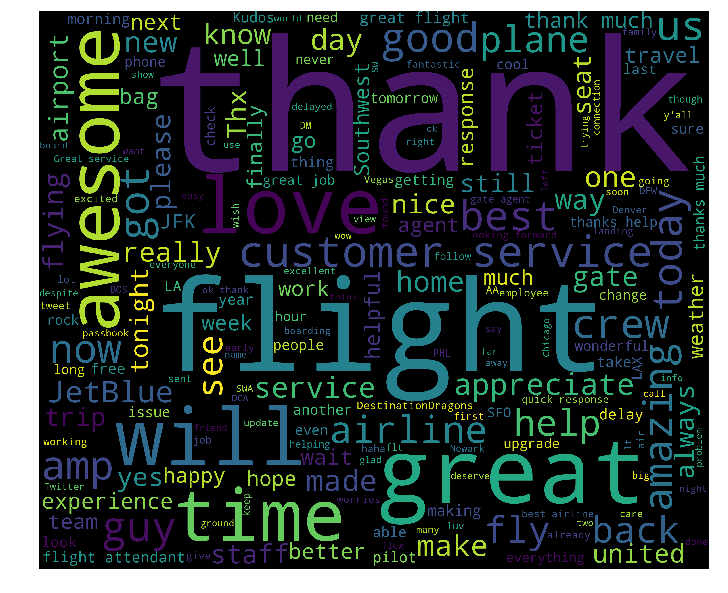

In [236]:
new_data=data[data['airline_sentiment']=='positive']
words = ' '.join(new_data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The result of WordCloud above is to show how frequent of the positive word appear in every tweets.<br>
mostly of the specific sentiment is about the giving thanks 

## Most used Words in Netral Tweets

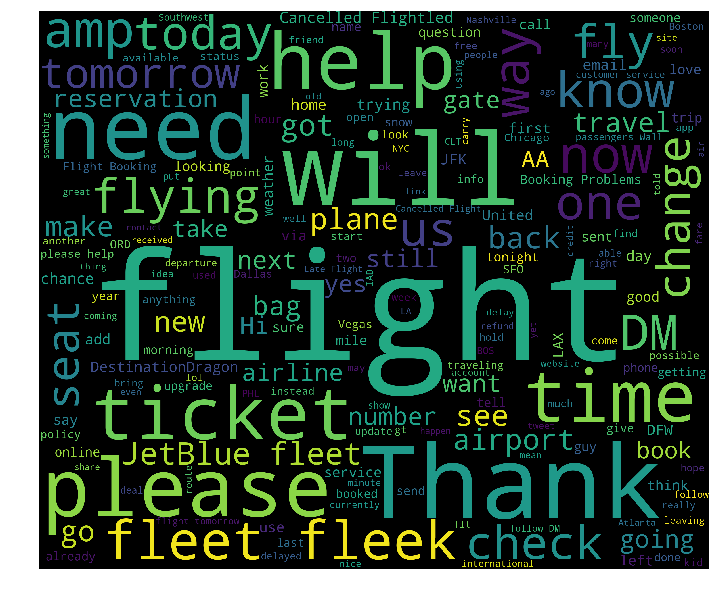

In [238]:
new_data=data[data['airline_sentiment']=='neutral']
words = ' '.join(new_data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The result of WordCloud above is to show how frequent of the neutral word appear in every tweets.<br>

In [189]:
# Calculate highest frequency words in positive tweets
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(cleaned_word))

Frequency of on is : 326
Frequency of the is : 916
Frequency of Thanks! is : 68
Frequency of flight is : 262
Frequency of at is : 178
Frequency of but is : 91
Frequency of to is : 912
Frequency of is is : 215
Frequency of in is : 307
Frequency of you is : 503
Frequency of fly is : 54
Frequency of :) is : 96
Frequency of was is : 225
Frequency of and is : 413
Frequency of with is : 194
Frequency of of is : 233
Frequency of from is : 123
Frequency of thanks is : 215
Frequency of be is : 133
Frequency of out is : 71
Frequency of a is : 498
Frequency of customer is : 100
Frequency of Thank is : 229
Frequency of you! is : 128
Frequency of service is : 100
Frequency of - is : 86
Frequency of you. is : 77
Frequency of for is : 654
Frequency of up is : 62
Frequency of I is : 570
Frequency of get is : 110
Frequency of my is : 314
Frequency of back is : 53
Frequency of very is : 54
Frequency of thank is : 202
Frequency of all is : 92
Frequency of so is : 161
Frequency of this is : 140
Frequency 

the result above that shows how frequent the conjuction appear. so I will spilt the conjuction from the main words

### Next step is.. We will know what are the reason for negative sentimental tweet for each airline

In [151]:
#get the number of negative reasons
data['negativereason'].nunique()

10

In [190]:
NR_Count=dict(df['negativereason'].value_counts(sort=False))
NR_Count

{'Bad Flight': 575,
 "Can't Tell": 1176,
 'Cancelled Flight': 829,
 'Customer Service Issue': 2885,
 'Damaged Luggage': 73,
 'Flight Attendant Complaints': 475,
 'Flight Booking Problems': 523,
 'Late Flight': 1650,
 'Lost Luggage': 719,
 'longlines': 177}

The result above that show count of negative reason based on the datasets. It is necessary to see how the negative reason distribution of data

In [153]:
def NR_Count(Airline):
    if Airline=='All':
        a=data
    else:
        a=data[data['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [154]:
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)


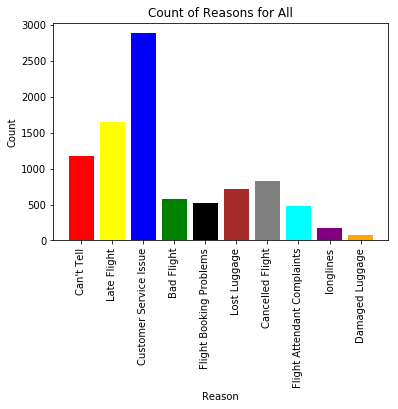

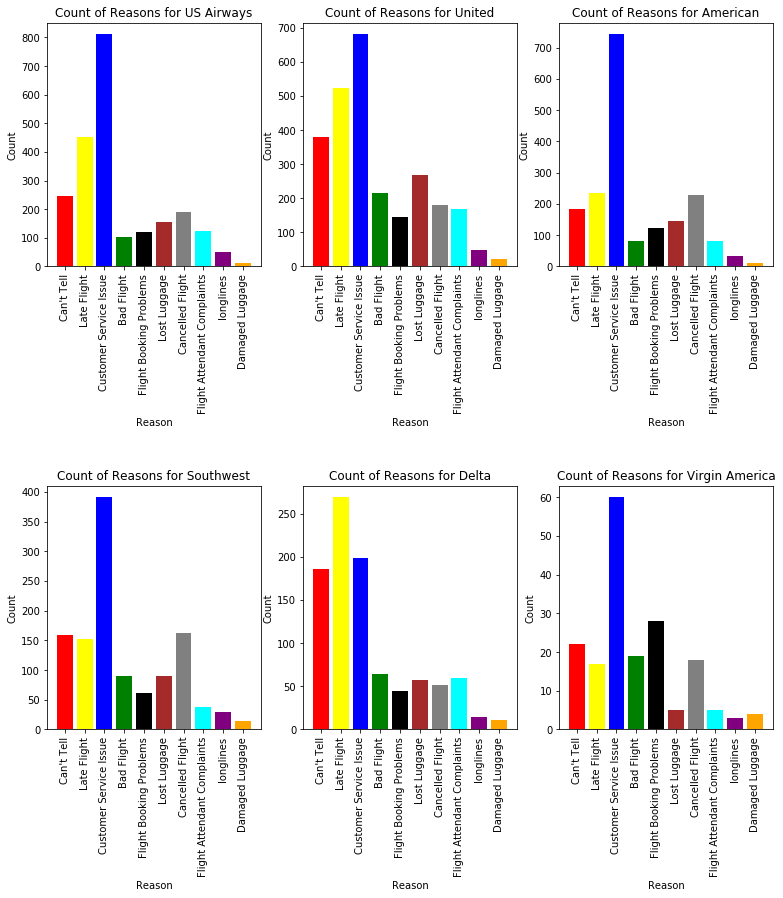

In [155]:
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

- Every negative sentimental of the Airline has the same problem. The most problem is Customer Service Issue except Delta Airline that has the most problem is Late Flight based on tweeted
- Delta has the Late Flight problem, but Customer issues has big count too. Also US Airways, United, has same big count too
- US Airways, United, and American Airline have more than 500 negative reason of Customer Issues


In [191]:
date = data.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
data = date
day_data = data.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_data

tweet_created  airline         airline_sentiment
2015-02-17     Delta           negative              51
                               neutral               63
                               positive              47
               Southwest       negative             162
                               neutral               69
                               positive              56
               US Airways      negative             156
                               neutral               22
                               positive              33
               United          negative             173
                               neutral               50
                               positive              29
               Virgin America  negative              10
                               neutral               16
                               positive              16
2015-02-18     Delta           negative             127
                               neutral               84

##### The dataset has data from 201502-17 to 2015-02-24
So I can make more variative visualization data by using date. I am going to see the the negative sentiment of each airline from each days

In [157]:
day_data = day_data.loc(axis=0)[:,:,'negative']
day_data

tweet_created  airline         airline_sentiment
2015-02-17     Delta           negative               51
               Southwest       negative              162
               US Airways      negative              156
               United          negative              173
               Virgin America  negative               10
2015-02-18     Delta           negative              127
               Southwest       negative              143
               US Airways      negative              259
               United          negative              281
               Virgin America  negative               17
2015-02-19     American        negative                1
               Delta           negative              127
               Southwest       negative              103
               US Airways      negative              189
               United          negative              224
               Virgin America  negative               22
2015-02-20     American        negative

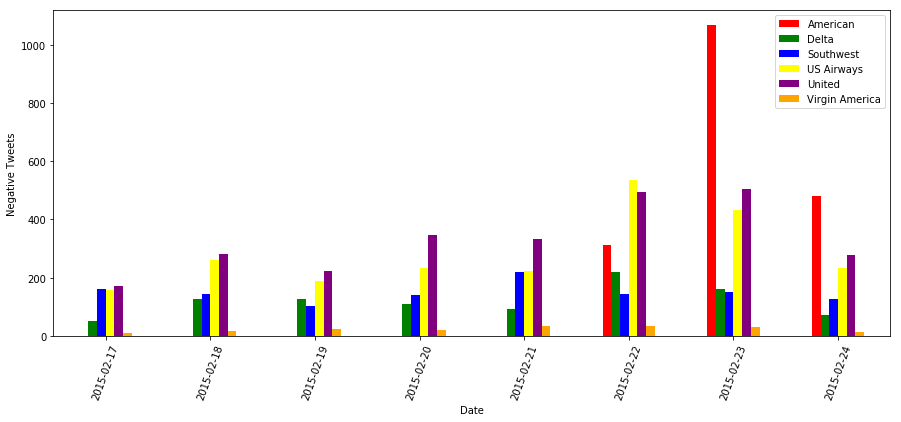

In [158]:
#groupby and plot data
ax2 = day_data.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

# Conclusion

- American Airline has negative tweet from 22 to 24 Februari 2015, but the most tweet at 23 Februari 2015. Maybe on that days, American Airline has a big deal problem
- United Airline relative increasing of the negative sentiment tweet from day to day but at 24 Februari is decreasing
- Southwest Asia has stagnant Negative Sentiment tweet
- US Airways relative increasing of the negative sentiment tweet
- United Airline relative increasing of the negative sentiment tweet from day to day
- Nicely Done! Virgin America has the least negative sentiment tweet 
<br>
So from this Visualization, All of US Airline can improve their customer Service Issue and Late Flight for better services to customer